In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/kaggle/input/risk-behavior-features-analysis/risk_behavior_features.csv')
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8


In [7]:
unique_counts = categorical_cols.nunique()
modes = categorical_cols.mode().iloc[0]
categorical_summary = pd.DataFrame({
    'Unique Values': unique_counts,
    'Most Frequent Value': modes
})

descriptive_stats

,Age,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Years in Current Job
count,73.000000,73.00000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,39.410959,1.60274,68188.643836,699.260274,0.288082,146890.287671,1.232877,7.410959
std,10.531481,1.25543,25709.974343,75.362094,0.126586,50949.713240,1.296583,3.915197
min,21.000000,0.00000,3512.000000,550.000000,0.110000,20626.000000,0.000000,0.000000
25%,32.000000,1.00000,54754.000000,634.000000,0.190000,114375.000000,0.000000,5.000000
50%,38.000000,2.00000,70978.000000,725.000000,0.240000,156630.000000,1.000000,9.000000
75%,48.000000,3.00000,85000.000000,755.000000,0.390000,172345.000000,2.000000,10.000000
max,69.000000,4.00000,117392.000000,801.000000,0.580000,282006.000000,4.000000,16.000000


In [8]:
categorical_summary

,Unique Values,Most Frequent Value
Gender,3,Male
Education Level,5,Master's
Marital Status,4,Married
Employment Status,2,Employed


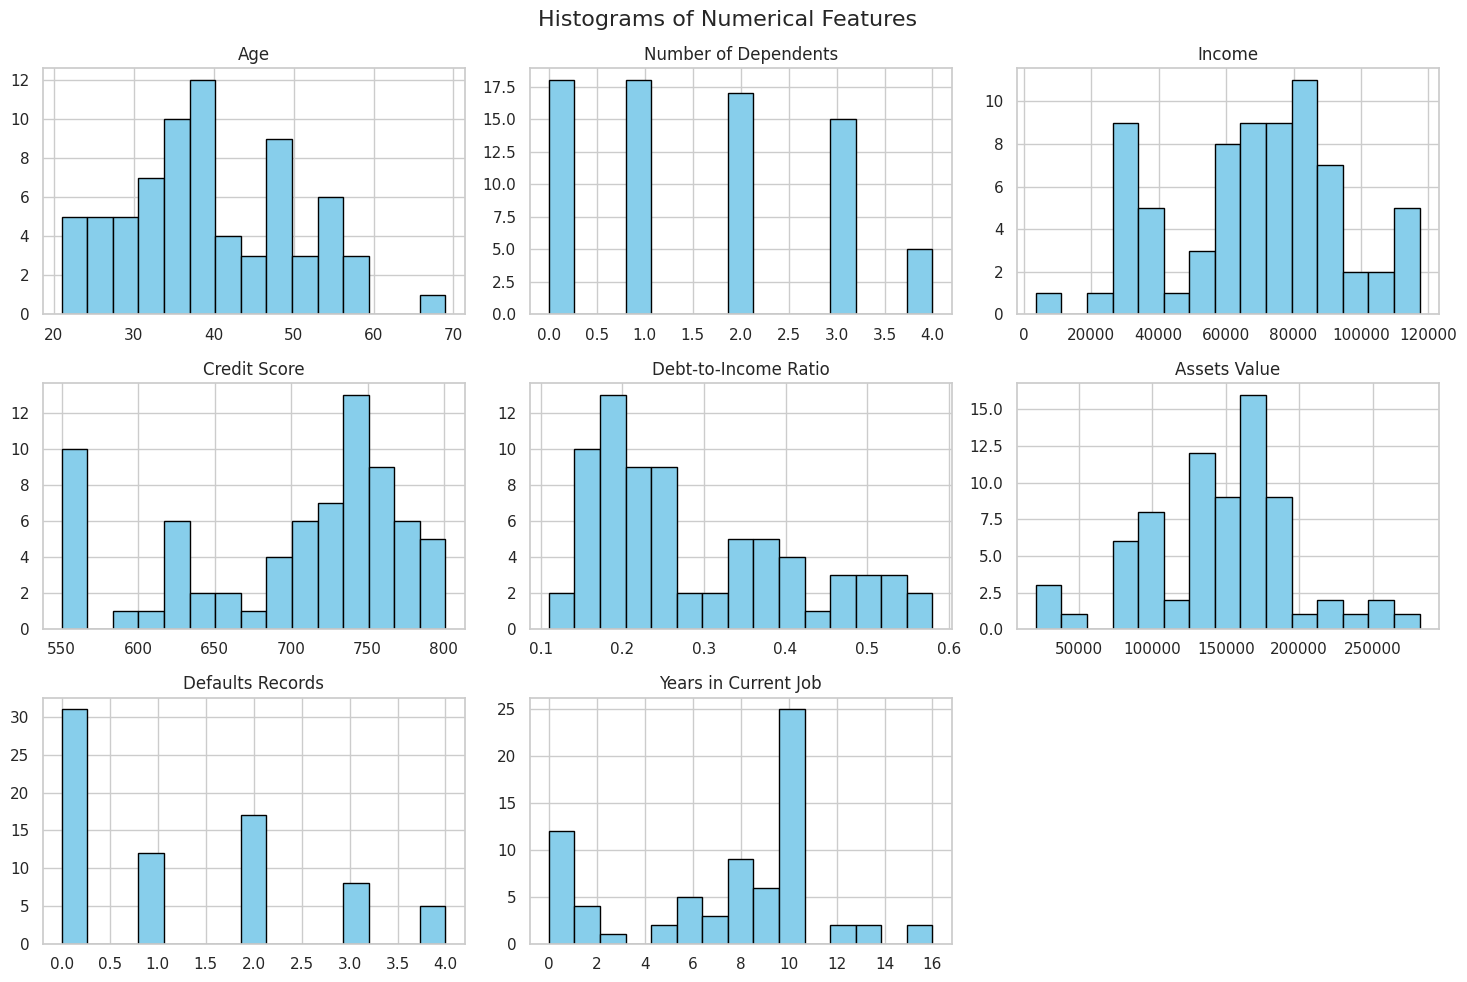

In [11]:
sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

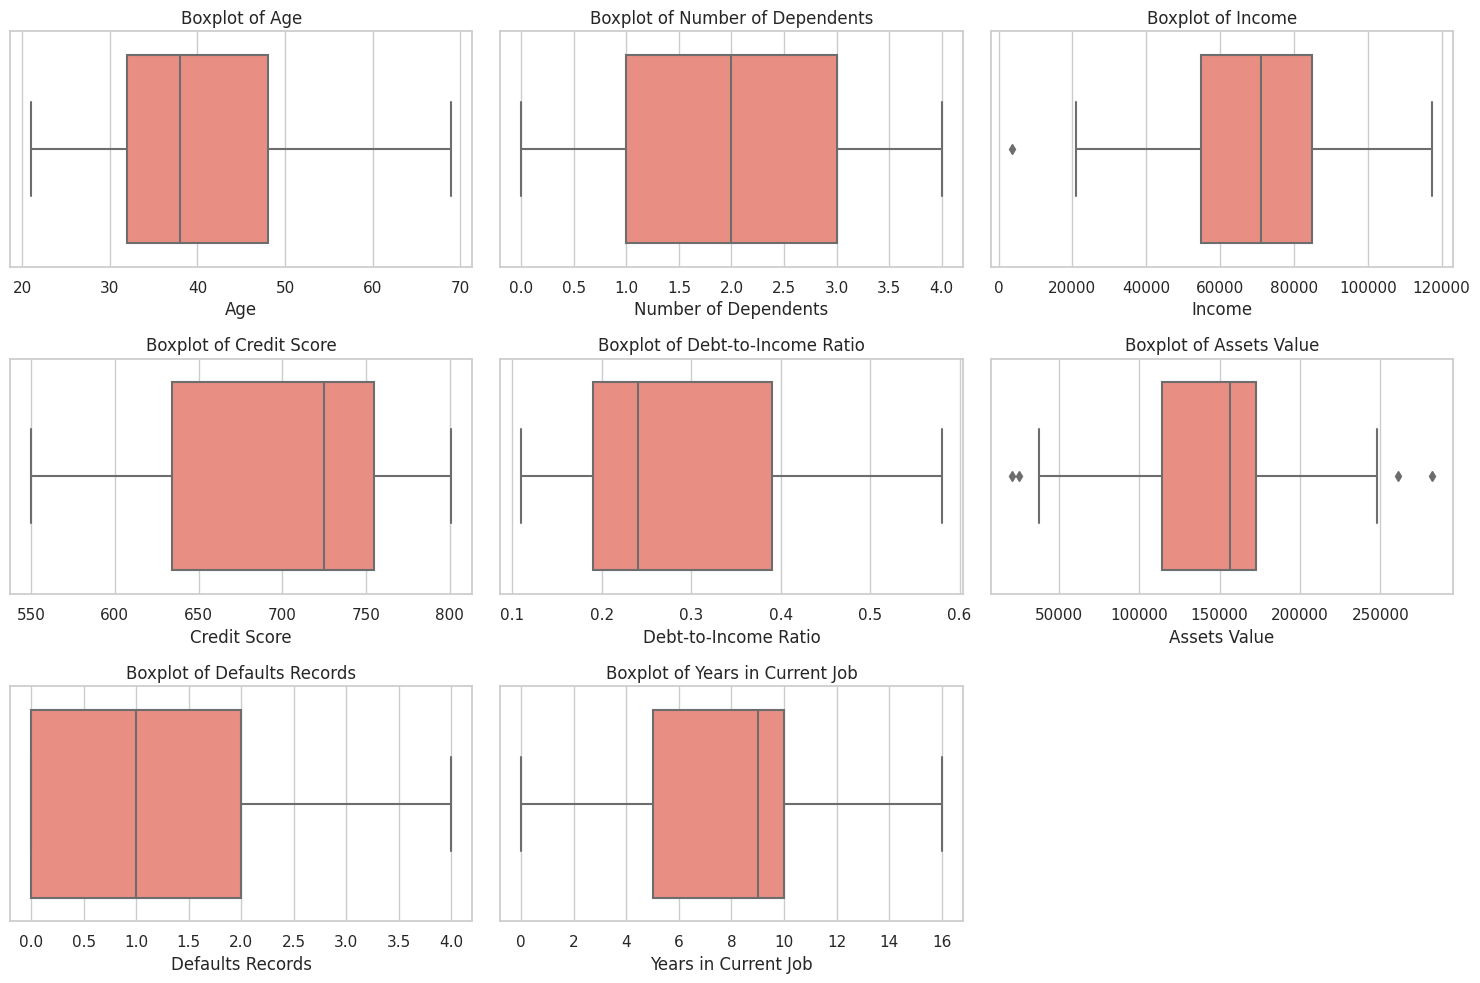

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

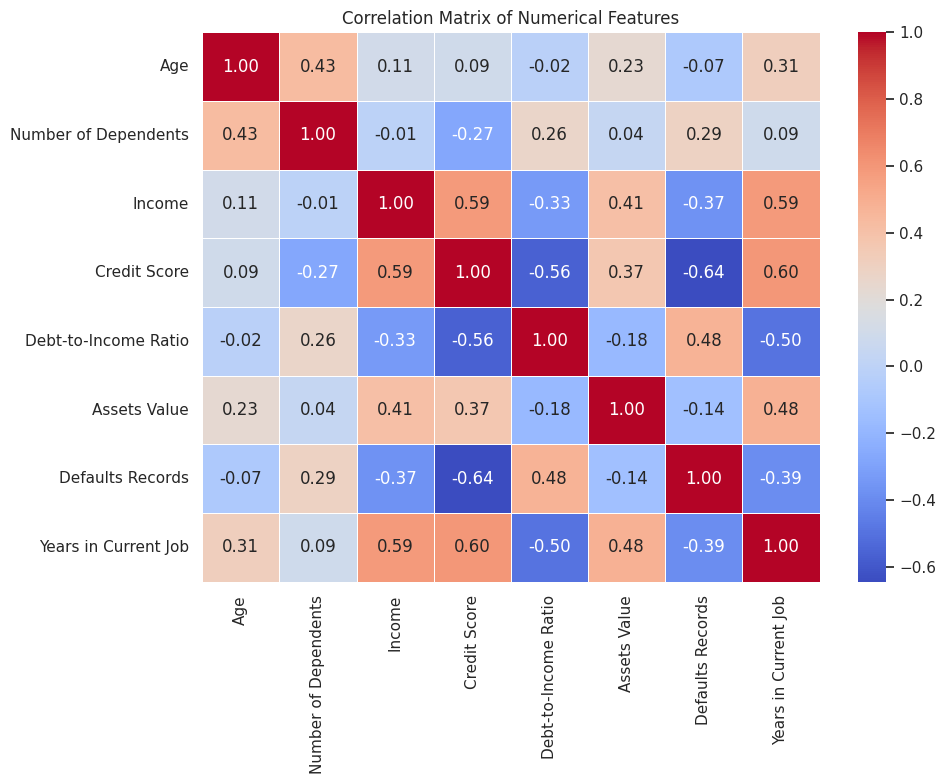

In [13]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

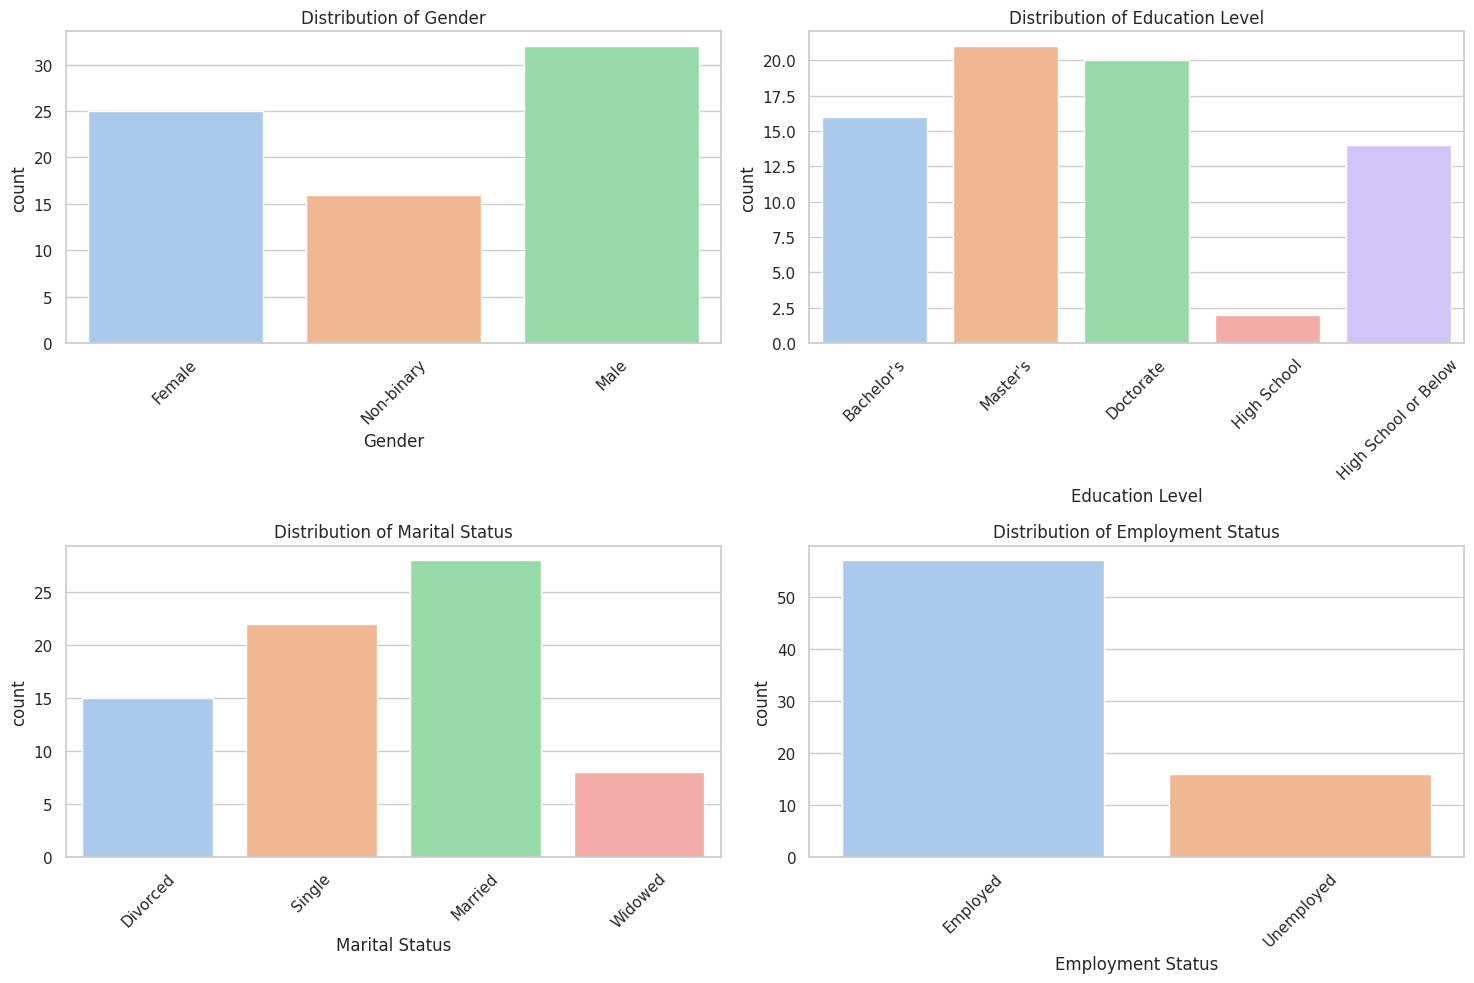

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

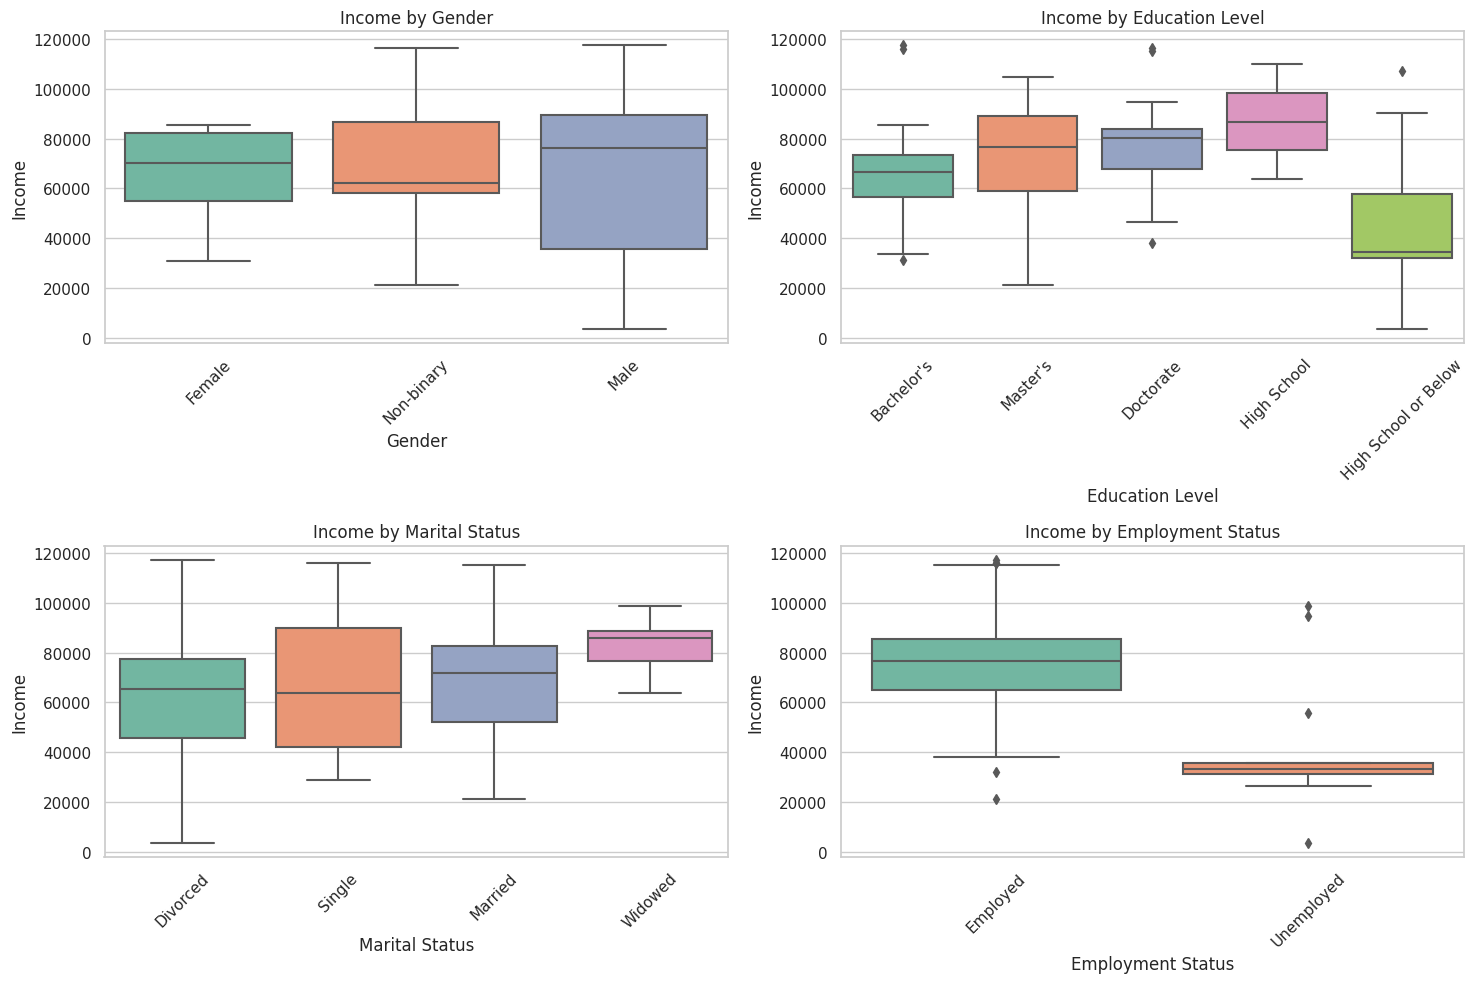

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=col, y='Income', data=df, palette="Set2")
    plt.title(f"Income by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

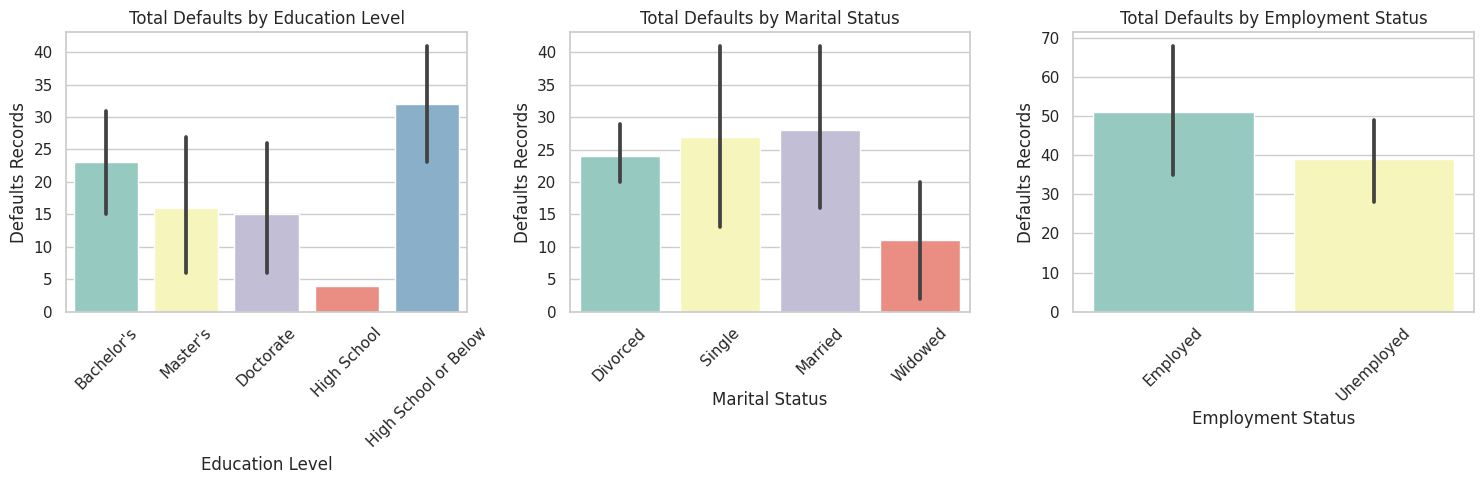

In [16]:
features_to_plot = ['Education Level', 'Marital Status', 'Employment Status']
plt.figure(figsize=(15, 5))
for i, col in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=col, y='Defaults Records', data=df, estimator=sum, palette='Set3')
    plt.title(f"Total Defaults by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df['High Risk'] = (
    (df['Credit Score'] < 650) |
    (df['Debt-to-Income Ratio'] > 0.4) |
    (df['Defaults Records'] >= 2)
)

df['High Risk'].value_counts()

High Risk
True     39
False    34
Name: count, dtype: int64

In [18]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,High Risk
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6,True
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10,False
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6,False
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10,False
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8,False


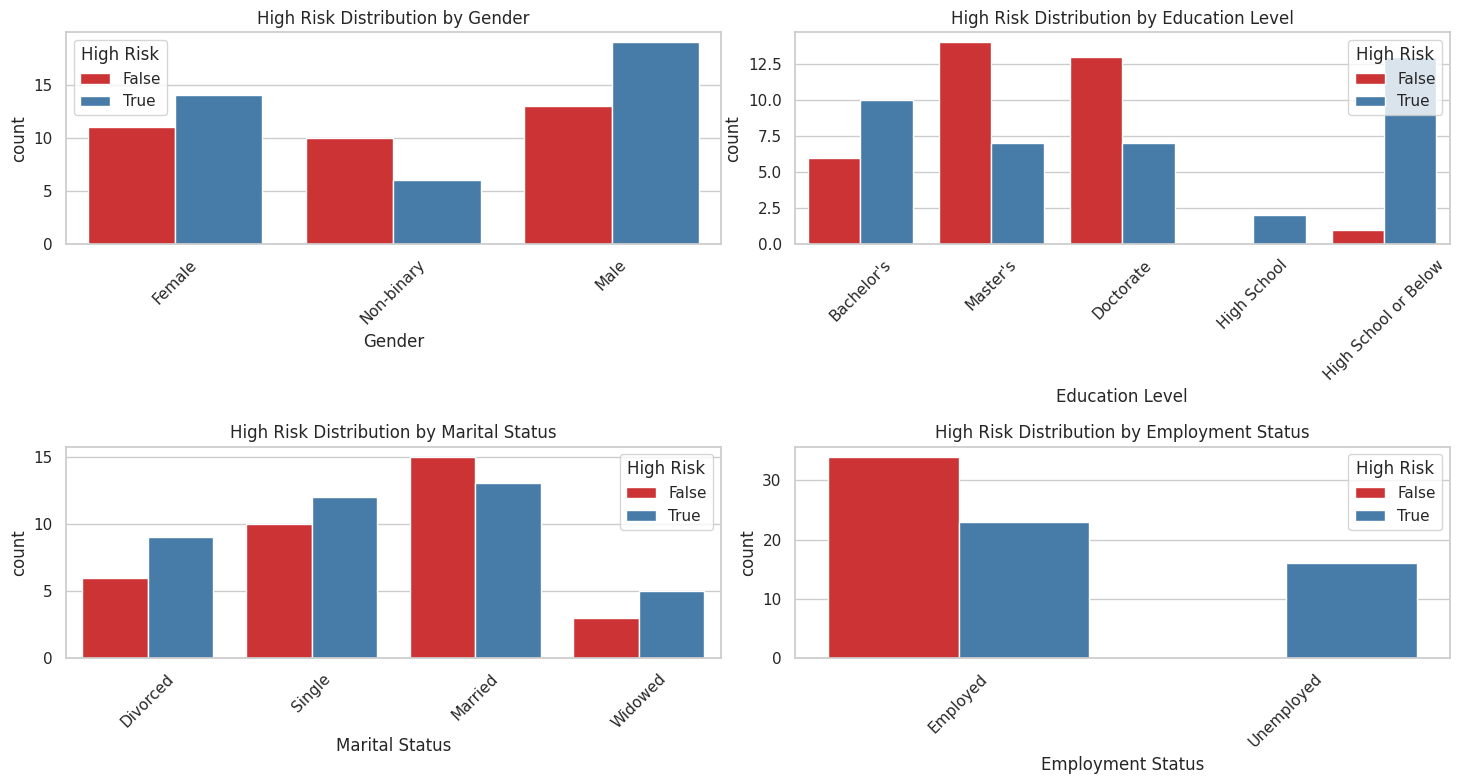

In [19]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Gender', 'Education Level', 'Marital Status', 'Employment Status']):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='High Risk', data=df, palette='Set1')
    plt.title(f'High Risk Distribution by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df.groupby('High Risk')[['Income', 'Credit Score', 'Debt-to-Income Ratio', 'Assets Value', 'Defaults Records']].mean()

,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records
High Risk,,,,,
False,77376.088235,753.411765,0.193529,159504.029412,0.235294
True,60179.076923,652.051282,0.370513,135893.692308,2.102564


In [21]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,High Risk
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6,True
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10,False
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6,False
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10,False
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8,False


In [22]:
def calculate_risk_score(row):
    score = 0
    
    # Credit Score
    if row['Credit Score'] < 600:
        score += 3
    elif row['Credit Score'] < 650:
        score += 2
    elif row['Credit Score'] < 700:
        score += 1

    # Debt-to-Income Ratio
    if row['Debt-to-Income Ratio'] > 0.5:
        score += 3
    elif row['Debt-to-Income Ratio'] > 0.4:
        score += 2
    elif row['Debt-to-Income Ratio'] > 0.3:
        score += 1

    # Defaults
    if row['Defaults Records'] >= 3:
        score += 3
    elif row['Defaults Records'] == 2:
        score += 2
    elif row['Defaults Records'] == 1:
        score += 1

    # Years in Job
    if row['Years in Current Job'] < 2:
        score += 2
    elif row['Years in Current Job'] < 5:
        score += 1

    return score

In [23]:
df['Risk Score'] = df.apply(calculate_risk_score, axis=1)

In [26]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,High Risk,Risk Score
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6,True,2
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10,False,0
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6,False,1
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10,False,0
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8,False,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


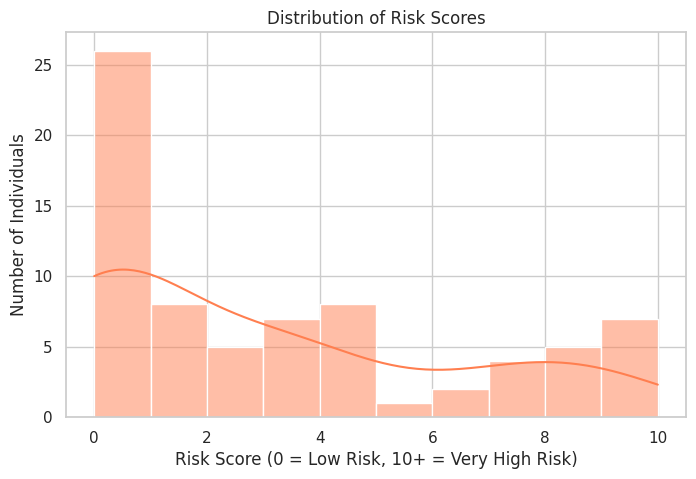

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Risk Score'], bins=10, kde=True, color='coral')
plt.title("Distribution of Risk Scores")
plt.xlabel("Risk Score (0 = Low Risk, 10+ = Very High Risk)")
plt.ylabel("Number of Individuals")
plt.show()

In [29]:
features = ['Credit Score', 'Debt-to-Income Ratio', 'Defaults Records', 'Income', 'Assets Value', 'Years in Current Job']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,High Risk,Risk Score,Cluster
68,23,Male,Master's,Single,0,28906,724,0.50,96640,0,Unemployed,1,True,4,2
69,22,Male,Master's,Single,0,104766,764,0.21,156630,3,Employed,10,True,3,1
70,41,Female,Doctorate,Widowed,0,79556,742,0.32,247857,4,Employed,10,True,4,0
71,47,Male,Bachelor's,Single,4,116102,629,0.52,228018,2,Employed,10,True,7,0
72,42,Male,High School or Below,Married,2,32094,634,0.55,114375,2,Employed,10,True,7,2


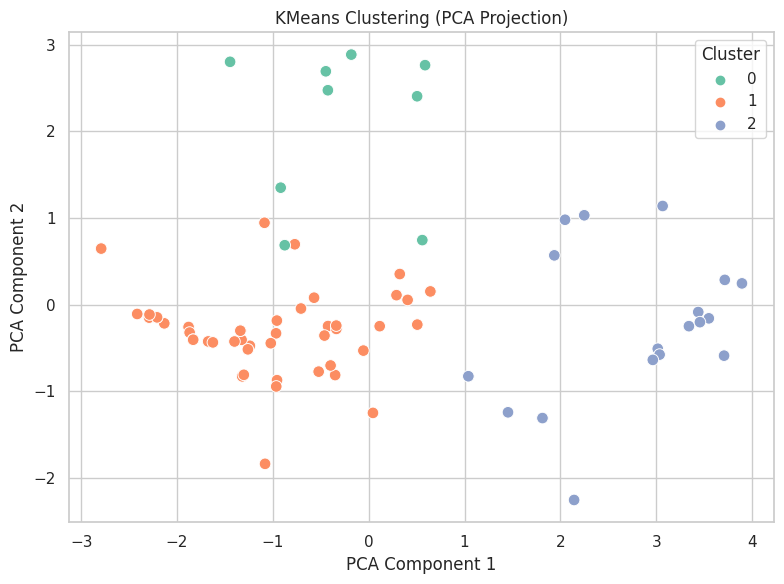

In [34]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Cluster'], palette='Set2', s=70)
plt.title("KMeans Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [36]:
df.groupby('Cluster')[features + ['Risk Score']].mean()

,Credit Score,Debt-to-Income Ratio,Defaults Records,Income,Assets Value,Years in Current Job,Risk Score
Cluster,,,,,,,
0,691.666667,0.443333,2.111111,90325.777778,211843.444444,10.222222,4.777778
1,739.521739,0.203261,0.673913,75760.782609,153072.739130,8.956522,0.891304
2,600.166667,0.427222,2.222222,37769.055556,98614.111111,2.055556,7.611111
